In [1]:
import numpy as np

def levenshtein(seq1, seq2):
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    #print (matrix)
    return (matrix[size_x - 1, size_y - 1])

In [31]:
import pandas as pd
df = pd.read_csv('ex_lan4.csv',delimiter=';',encoding='latin')

In [32]:
df.head()

,FR,EN,DE,ES,CT,IT,RU,PL,UK,AZ,...,YI,SC,MK,LA,EU,WA,ML,LU,IS,IR
0,maison,House,Haus,casa,casa,casa,dom,dom,Budynok,Ev,...,hoyz,Taigh,Kuka,domum,Etxea,ty,Dar,Haus,Hus,Teach
1,ville,city,Stadt,ciudad,ciutat,citta,gorod,miasto,misto,sahar,...,shtot,bhaile mor,grad,urbs,hiri,ddinas,belt,Stad,borg,cathrach
2,porte,door,Tur,puerta,porta,porta,dver,drzwi,dveri,qapi,...,tir,doras,vrata,ianua,ate,drws,bieb,Dier,hurdh,doras
3,route,road,Strasse,carretera,carretera,strada,doroga,droga,doroha,Yol,...,veg,rathad,pat,via,errepide,ffordd,fit triq,Strooss,vegur,bothar
4,homme,man,Mann,hombre,home,uomo,chelovek,mezczyzna,lyudyna,adam,...,mentsh,dhuine,Covek,vir,gizon,dyn,ragel,Mann,madhur,fear


In [33]:
df.shape

(94, 45)

In [34]:
colname = df.columns

In [35]:
def comp(l1, l2) :
    dl = 0
    for index, row in df.iterrows(): 
        dl += levenshtein(row[l1],row[l2])
    return (df.columns[l1], df.columns[l2], dl)

In [36]:
dfL = pd.DataFrame(index=colname, columns=colname)

for i in range(0,len(df.columns)) :
    for j in range(0,len(df.columns)):
        r = comp(i,j)
        dfL[r[0]][r[1]] = r[2]

In [37]:
dfL.head()

,FR,EN,DE,ES,CT,IT,RU,PL,UK,AZ,...,YI,SC,MK,LA,EU,WA,ML,LU,IS,IR
FR,0,490,605,422,362,379,680,628,662,624,...,602,708,596,516,599,602,566,597,622,623
EN,490,0,502,514,461,511,622,587,585,584,...,471,629,522,485,538,489,533,473,516,539
DE,605,502,0,620,571,625,675,623,641,627,...,404,678,578,581,602,587,630,325,580,609
ES,422,514,620,0,292,387,669,624,667,641,...,610,716,599,508,588,587,569,599,632,625
CT,362,461,571,292,0,361,643,611,637,601,...,557,661,561,487,566,540,519,554,584,567


In [38]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(dfL)

     FR   EN   DE   ES   CT   IT   RU   PL   UK   AZ   RO   NL   TU   GR   HU  \
FR    0  490  605  422  362  379  680  628  662  624  508  594  634  635  604   
EN  490    0  502  514  461  511  622  587  585  584  487  481  573  573  556   
DE  605  502    0  620  571  625  675  623  641  627  592  404  623  640  586   
ES  422  514  620    0  292  387  669  624  667  641  498  591  636  644  619   
CT  362  461  571  292    0  361  643  611  637  601  461  560  597  608  577   
IT  379  511  625  387  361    0  659  610  645  632  489  588  632  625  611   
RU  680  622  675  669  643  659    0  567  410  697  656  653  714  687  673   
PL  628  587  623  624  611  610  567    0  500  630  603  607  642  656  628   
UK  662  585  641  667  637  645  410  500    0  647  645  627  679  661  642   
AZ  624  584  627  641  601  632  697  630  647    0  607  602  417  648  609   
RO  508  487  592  498  461  489  656  603  645  607    0  581  599  598  586   
NL  594  481  404  591  560 

In [39]:
dfD = pd.DataFrame(index=colname, columns=['x','y','z'])
for index, row in dfD.iterrows(): 
    row['x'] = np.random.random_sample()
    row['y'] = np.random.random_sample()
    row['z'] = np.random.random_sample()

In [40]:
dfD.head()

,x,y,z
FR,0.958175,0.740463,0.578168
EN,0.376442,0.129569,0.074875
DE,0.351611,0.0427101,0.869006
ES,0.26848,0.719334,0.526785
CT,0.594053,0.619224,0.886998


In [41]:
from math import *
dfL2 = pd.DataFrame(index=colname, columns=colname)

for i in range(0,len(dfD.index)) :
    for j in range(0,len(dfD.index)):
        d = sqrt((dfD['x'][i]-(dfD['x'][j]))**2+(dfD['y'][i]-(dfD['y'][j]))**2+(dfD['z'][i]-(dfD['z'][j]))**2)
        dfL2[dfD.index[i]][dfD.index[j]] = d
dfL2.head()

,FR,EN,DE,ES,CT,IT,RU,PL,UK,AZ,...,YI,SC,MK,LA,EU,WA,ML,LU,IS,IR
FR,0,0.982299,0.969209,0.69193,0.492605,0.650607,0.709662,0.905947,0.428224,0.503913,...,1.03197,0.629986,0.619623,1.19139,1.0913,0.713236,0.663783,0.584746,0.557285,0.671551
EN,0.982299,0,0.799253,0.750801,0.972965,0.477274,0.544881,0.227284,0.814938,0.62931,...,0.773311,0.411167,0.782412,0.258513,0.680339,0.482168,0.390475,0.62167,0.906194,0.890974
DE,0.969209,0.799253,0,0.762788,0.625676,0.974546,0.619217,0.763947,0.650205,0.755209,...,0.156673,0.653368,0.793728,0.814221,1.11017,0.39724,0.683545,0.413703,1.13967,1.11771
ES,0.69193,0.750801,0.762788,0,0.495756,0.575167,0.22542,0.83662,0.758314,0.254567,...,0.709159,0.397493,0.0841022,0.827235,0.549537,0.583982,0.704917,0.535034,0.473762,0.391952
CT,0.492605,0.972965,0.625676,0.495756,0,0.813392,0.530381,0.942735,0.478615,0.472816,...,0.667303,0.586753,0.457579,1.09442,1.03054,0.563574,0.728681,0.406546,0.716389,0.732237


In [42]:
dfL = dfL.astype("float32")
dfL2 = dfL2.astype("float32")

In [13]:
import statistics as st

In [56]:
c1 = st.mean(dfL.corrwith(dfL2))
d1 = min(dfL.corrwith(dfL2))

In [44]:
dfDT = dfD.copy()

In [16]:
from IPython.display import display, clear_output
import sys

In [59]:
p = 0.001

for x in range (0,100) :   
    for index, row in dfDT.iterrows(): 
        row['x'] = np.random.normal(row['x'], p, 1)[0]
        row['y'] = np.random.normal(row['y'], p, 1)[0]
        row['z'] = np.random.normal(row['z'], p, 1)[0]

    for i in range(0,len(dfDT.index)) :
        for j in range(0,len(dfDT.index)):
            d = sqrt((dfDT['x'][i]-(dfDT['x'][j]))**2+(dfDT['y'][i]-(dfDT['y'][j]))**2+(dfDT['z'][i]-(dfDT['z'][j]))**2)
            dfL2[dfDT.index[i]][dfDT.index[j]] = d
    dfL2
    dfL = dfL.astype("float32")
    dfL2 = dfL2.astype("float32")
    c2 = st.mean(dfL.corrwith(dfL2))
    d2 = min(dfL.corrwith(dfL2))

    if c2 > c1 :
        dfD = dfDT.copy()
        c1 = c2
        d1 = d2
    else :
        dfDT = dfD.copy()
        
    sys.stdout.flush()
    clear_output(wait=True)
    print(str(round(c1*100,4))+" ("+str(round(d1*100,4))+")")

print(c1)

73.139 (54.0139)
0.7313897725764956


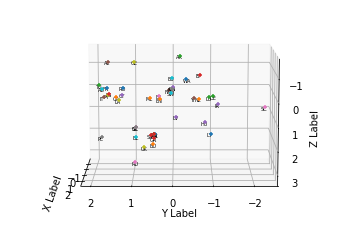

In [48]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for index, row in dfD.iterrows(): 
    xs = row['x']
    ys = row['y']
    zs = row['z']
    n = row.name
    ax.scatter(xs, ys, zs, marker="+")
    ax.text(xs+0.1, ys+0.1, zs+0.1, n, fontsize=5)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

fig = plt.figure(1, figsize=(25, 8))
for i in range (0,36) :
    ax.view_init(30, i*10)
    fig.savefig('img/lan_3d_x'+str(i*10)+'.png',dpi=200)
    
for i in range (3,36) :
    ax.view_init(i*10, 0)
    fig.savefig('img/lan_3d_y'+str(i*10)+'.png',dpi=200)

plt.show()


#for angle in range(0, 360):
#    ax.view_init(30, angle)
#    plt.draw()
#    plt.pause(.001)

In [60]:
RGB = round((dfD - dfD.min()) / (dfD.max() - dfD.min())*239+16,0)

In [61]:
RGB

,x,y,z
FR,191.261,237.115,70.7627
EN,149.793,164.632,102.019
DE,105.949,89.7178,104.521
ES,200.472,234.992,83.7982
CT,187.881,215.182,86.2883
IT,197.725,241.011,92.0563
RU,116.728,199.315,255
PL,110.791,249.024,196.456
UK,85.9393,186.876,225.266
AZ,46.8282,249.63,93.6403


In [62]:
from sty import fg, Style, RgbFg

for index, row in RGB.iterrows(): 

    fg.color = Style(RgbFg(int(row['x']), int(row['y']), int(row['z'])))
    #print((int(row['x']), int(row['y']), int(row['z'])))
    
    buf = fg.color + row.name + fg.rs

    print(buf, sep='\n')

FR
EN
DE
ES
CT
IT
RU
PL
UK
AZ
RO
NL
TU
GR
HU
FI
EE
CZ
PT
SW
SR
BU
AR
HR
DN
AL
SK
NO
GE
BL
LT
GA
BH
SV
LV
YI
SC
MK
LA
EU
WA
ML
LU
IS
IR
